In [32]:
import pandas as pd, numpy as np, mglearn, numpy.linalg as nl
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from tqdm import tqdm
from matplotlib.pyplot import *
from sklearn.decomposition import TruncatedSVD

In [2]:
# Set up data:
src_train = Path('datasets_Hwk1/datasets_Hwk1/wine_train.csv')
src_test = Path('datasets_Hwk1/datasets_Hwk1/wine_test.csv')

train = pd.read_csv(src_train,index_col=0).reset_index(drop=True)
x_train = train.drop(columns=['quality'])
y_train = train['quality']
test = pd.read_csv(src_test,index_col=0).reset_index(drop=True)
x_test = test.drop(columns=['quality'])
y_test = test['quality']

train_combo = (x_train,y_train)
test_combo = (x_test, y_test)

#Set up output stuff
outdir = Path('output')
#Skipping validation step for this assignment


In [17]:
#General Analysis work: Where I lay the steps that every problem will take

def make_knn(neighbor):
    return KNeighborsRegressor(n_neighbors=neighbor)
def make_ols(dummy):
    return LinearRegression()
def make_ridge(alpha):
    return Ridge(alpha=alpha)
def make_lasso(alpha):
    return Lasso(alpha=alpha)

def basic_analyze(make_func,attr_list, train_data, test_data,attr_name= 'attribute' ,save = False, out_dir = ''):
    result = []
    for attr in tqdm(attr_list):
        model = make_func(attr)
        model.fit(train_data[0],train_data[1])
        result.append([attr,model.score(train_data[0],train_data[1]), model.score(test_data[0],test_data[1])])
        del(model)
    df = pd.DataFrame(columns = [attr_name,'train_score','test_score'],data=result)
    if save:
        df.to_csv(Path(out_dir,'Performance.csv'),index=False)
        if df.shape[0] >10:
            df.iloc[:10].to_latex(Path(out_dir,'Performance.tex'),index=False)
        else:
            df.to_latex(Path(out_dir,'Performance.tex'),index=False)
    return df

def plot_result(item, x_name, title, save = False, out_dir = ''):
    if type(item) == type(Path('.')):
        df = pd.read_csv(item)
    else:
        df = item
    plt = df.plot(x=x_name, ylabel='R^2 Score',title=title)
    if save:
        plt.get_figure().savefig(Path(out_dir,'plot.png'))

100%|██████████| 100/100 [00:07<00:00, 13.10it/s]
/tmp/ipykernel_3779/968257064.py:23: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.iloc[:10].to_latex(Path(out_dir,'Performance.tex'),index=False)


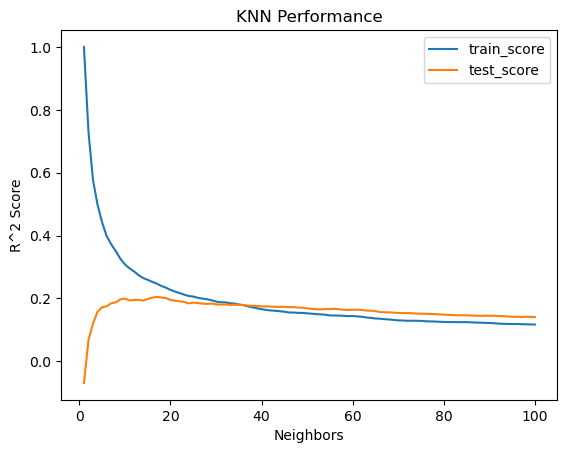

In [5]:
#Problem 1:
Neighbors = np.array(range(1,101))
knn_outdir = Path(outdir,'knn')
if not knn_outdir.is_dir():
    knn_outdir.mkdir()
knn_res = basic_analyze(make_knn,Neighbors, train_combo, test_combo, attr_name='Neighbors',save=True, out_dir=knn_outdir)
plot_result(knn_res, 'Neighbors', 'KNN Performance',save=True, out_dir=knn_outdir)



In [13]:
knn_res.iloc[knn_res['test_score'].argmax()]

Neighbors      17.000000
train_score     0.246827
test_score      0.204763
Name: 16, dtype: float64

In [7]:
#Problem 2:

ols_outdir = Path(outdir,'ols')
if not ols_outdir.is_dir():
    ols_outdir.mkdir()
#Yeah, I'm kinda bootlegging my setup for this. Oh well. 
ols_res = basic_analyze(make_ols,[1],train_combo, test_combo, save=True, out_dir=ols_outdir)
ols_res

100%|██████████| 1/1 [00:00<00:00, 83.78it/s]
/tmp/ipykernel_3779/968257064.py:25: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(Path(out_dir,'Performance.tex'),index=False)


,attribute,train_score,test_score
0,1,0.276098,0.336736


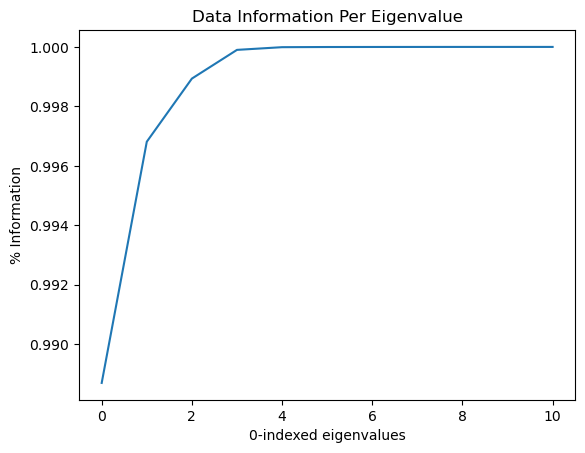

In [13]:
U,S,Vt = nl.svd(x_train.values)
eig = S**2
info = eig.cumsum()/eig.sum()
figure()
plot(info)
ylabel("% Information")
title("Data Information Per Eigenvalue")
xlabel("0-indexed eigenvalues")
savefig("Information.png")
show() 

In [40]:
svd = TruncatedSVD(n_components=1)
svd.fit(x_train.values)
x_train_new = svd.transform(x_train.values)
x_test_new = svd.transform(x_test.values)
ols_red_outdir = Path(outdir,'ols_reduced')
if not ols_red_outdir.is_dir():
    ols_red_outdir.mkdir()
#Yeah, I'm kinda bootlegging my setup for this. Oh well. 
ols_reduced_res = basic_analyze(make_ols,[1],(x_train_new,y_train), (x_test_new,y_test), save=True, out_dir=ols_red_outdir)
ols_reduced_res

100%|██████████| 1/1 [00:00<00:00, 452.17it/s]
/tmp/ipykernel_363/968257064.py:25: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(Path(out_dir,'Performance.tex'),index=False)


,attribute,train_score,test_score
0,1,0.00155,-0.000209


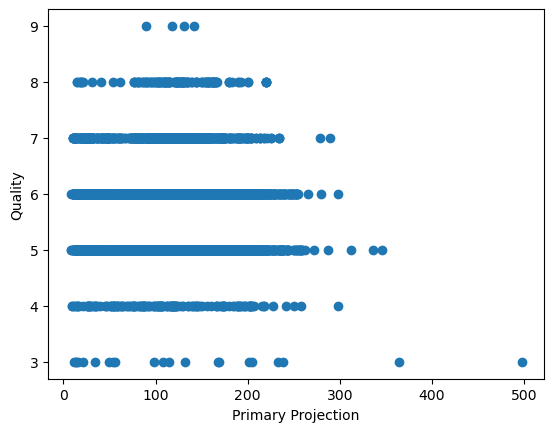

In [42]:
figure()
scatter(x_train_new,y_train)
xlabel("Primary Projection")
ylabel("Quality")
savefig("SVD_Plot.png")
show()

100%|██████████| 101/101 [00:00<00:00, 103.00it/s]
/tmp/ipykernel_3779/968257064.py:23: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.iloc[:10].to_latex(Path(out_dir,'Performance.tex'),index=False)


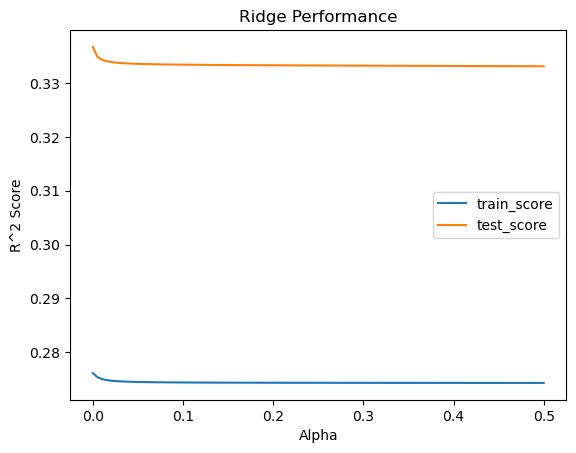

In [8]:
#Problem 3:
ridge_attr = np.linspace(0,.5,101)
ridge_outdir = Path(outdir,'ridge')
if not ridge_outdir.is_dir():
    ridge_outdir.mkdir()
ridge_res = basic_analyze(make_ridge, ridge_attr, train_combo, test_combo, attr_name='Alpha', save=True, out_dir=ridge_outdir)
plot_result(ridge_res, 'Alpha', 'Ridge Performance', save=True, out_dir = ridge_outdir)
#Calculate the covariance of the input x to itself, and the input y to the input x

  0%|          | 0/101 [00:00<?, ?it/s]/tmp/ipykernel_3779/968257064.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(train_data[0],train_data[1])
/home/tylman/anaconda3/envs/ketsu/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/tylman/anaconda3/envs/ketsu/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.333e+03, tolerance: 3.682e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV

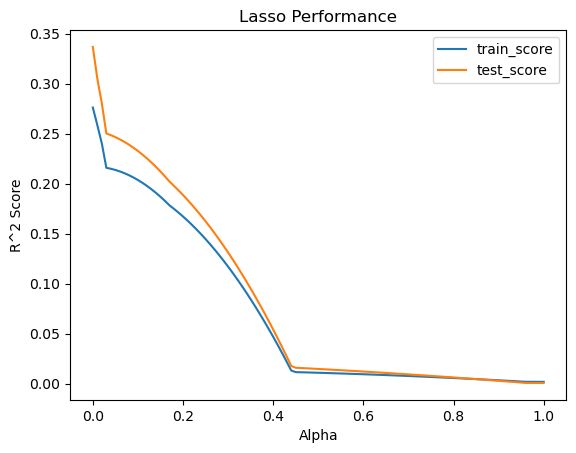

In [9]:
#Problem 4:
lasso_attr = np.linspace(0,1,101)
lasso_outdir = Path(outdir,'lasso')
if not lasso_outdir.is_dir():
    lasso_outdir.mkdir()
lasso_res = basic_analyze(make_lasso, lasso_attr, train_combo, test_combo, attr_name='Alpha', save=True, out_dir=lasso_outdir)
plot_result(lasso_res, 'Alpha', 'Lasso Performance', save=True, out_dir = lasso_outdir)
#Calculate the covariance of the input x to itself, and the input y to the input x

In [10]:
# Results by someone else: https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46

In [43]:
test

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,5.8,0.36,0.26,3.3,0.038,40.0,153.0,0.99110,3.34,0.55,11.3,6
1,9.9,0.63,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
2,10.0,0.48,0.24,2.7,0.102,13.0,32.0,1.00000,3.28,0.56,10.0,6
3,6.9,0.39,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,4
4,7.8,0.53,0.33,2.4,0.080,24.0,144.0,0.99655,3.30,0.60,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1620,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5
1621,6.9,0.17,0.25,1.6,0.047,34.0,132.0,0.99140,3.16,0.48,11.4,5
1622,6.4,0.12,0.30,1.1,0.031,37.0,94.0,0.98986,3.01,0.56,11.7,6
1623,7.1,0.31,0.25,11.2,0.048,32.0,136.0,0.99663,3.14,0.40,9.5,5
